# Logistic Regression with SGD Momentum

### Creating Numpy array

# Data preparation

### Download

In [1]:
#!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz;
#!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz;
#!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz;
#!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz;
# Unpacking all files
#!gunzip *.gz

# Узнать про типы данныхпо примеру у_train

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from src.preprocessing import Scaler
from src.metrics import train_test

In [2]:
import numpy as np
from src.preprocessing import load_data

X_train, y_train = load_data("train")

X_train = X_train.reshape(-1,28*28)
y_train = y_train.reshape(-1,1)
# +1 - even
# -1 - odd
y_train_parity = np.where(y_train%2, -1, 1) 

### Scaler implementation(?)

### Faster then sklearn.preprocessing.StandardScaler

In [3]:
scaler = Scaler()
scaler.fit(X_train)
X_train_scaled = scaler.standardize(X_train)

### Visualization

[7]


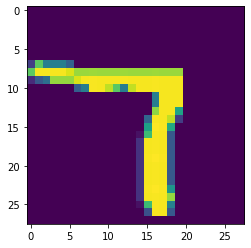

In [4]:
import matplotlib.pyplot as plt

idx = 1046#np.random.randint(0, high=X_train_scaled.shape[0])
print(y_train[idx])
image = np.asarray(X_train[idx]).reshape(28, 28)
plt.imshow(image)
plt.show()

# Test

In [5]:
X_test, y_test = load_data("t10k")

X_test = X_test.reshape(-1,28*28)
y_test = y_test.reshape(-1,1)
# +1 - even
# -1 - odd
y_test_parity = np.where(y_test%2, -1, 1) 
X_test_scaled = scaler.standardize(X_test)

### Bencmark

In [6]:
# Benchmark

sdg_sk = SGDClassifier(loss="log", n_jobs=-1)
log_cv = LogisticRegressionCV()

In [7]:
sdg_sk.fit(X_train_scaled,y_train_parity.ravel())

preds = sdg_sk.predict(X_train_scaled)
print("Train: ",accuracy_score(y_train_parity, preds))

preds = sdg_sk.predict(X_test_scaled)
print("Test: ", accuracy_score(y_test_parity, preds))

Train:  0.9013203760430971
Test:  0.8980342422320863


# Feature engineering

In [55]:
X_train[:,:12].max(axis=0).shape

(12,)

In [33]:
X_test.max(axis=0)[:12]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [13]:
model = LogisticRegressionBinary(alpha = 0.9, C = 1.1, learning_rate = 0.01, max_iter = 20, eps = 10e-6, batch_size = 64, shuffle=True)
train_test(model, X_train_scaled, y_train_parity, X_test_scaled, y_test_parity)

Train:  0.844111122847787
Test:  0.8409638554216867


In [20]:
model = LogisticRegressionBinary(alpha = 0.9, C = 1.1, learning_rate = 0.006, max_iter = 20, eps = 10e-6, batch_size = 64, shuffle=True)
train_test(model, X_train_scaled[:,12:], y_train_parity, X_test_scaled[:,12:], y_test_parity)

Train:  0.8561529523608323
Test:  0.8502219403931516


# PCA

In [36]:
pca = PCA(n_components=10)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
model = LogisticRegressionBinary(alpha = 0.9, C = 1.1, learning_rate = 0.006, max_iter = 20, eps = 10e-6, batch_size = 64, shuffle=True)
train_test(model, X_train_pca, y_train_parity, X_test_pca, y_test_parity)

/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.7737614872715749
Test:  0.7652504755865568


In [38]:
for n_komp in [10,20,30,40,100,300]:
    print(n_komp)
    pca = PCA(n_components=n_komp)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LogisticRegressionBinary(alpha = 0.9, C = 1.1, learning_rate = 0.006, max_iter = 20, eps = 10e-6, batch_size = 64, shuffle=True)
    train_test(model, X_train_pca, y_train_parity, X_test_pca, y_test_parity)
    print("________________________________")

10


/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.8266399070455266
Test:  0.8296766011414077
________________________________
20


/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.8467730009506708
Test:  0.8445149017121116
________________________________
30


/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.8473222773845991
Test:  0.8437539632213062
________________________________
40


/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.8517376148727157
Test:  0.8488268864933418
________________________________
100


/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.8510404563219605
Test:  0.8467977171845276
________________________________
300


/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.8599767613816415
Test:  0.8584654407102092
________________________________


In [39]:
pca = PCA(n_components=300)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Train:  0.7922256258582444
Test:  0.7968294229549778


In [41]:
model = LogisticRegressionBinary(alpha = 0.9, C = 1.1, learning_rate = 0.01, max_iter = 30, eps = 10e-6, batch_size = 64, shuffle=True)
train_test(model, X_train_pca, y_train_parity, X_test_pca, y_test_parity)

/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


Train:  0.850068659554241
Test:  0.8459099556119214
